In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


# Kaggle Preparation

In [ ]:
import re
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"leonardrizta","key":"9e49c9b604d0e7ce6ee28ad39bffc2b1"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-06-01 11:18:46           6536  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           3835  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1312  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           2059  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

# Dataset Download

In [ ]:
!kaggle datasets download -d shubhamgoel27/dermnet

100% 1.72G/1.72G [00:12<00:00, 37.1MB/s]
100% 1.72G/1.72G [00:12<00:00, 145MB/s] 


In [ ]:
dataset_path = "/content/dermnet.zip"
zip_ref = zipfile.ZipFile(dataset_path, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
train_data_dir = '/tmp/train/'
validation_data_dir = '/tmp/test/'

# Dataset Preparation

In [ ]:
train_data_list = os.listdir(train_data_dir)
validation_data_list = os.listdir(validation_data_dir)
print(os.listdir(train_data_dir))
print(os.listdir(validation_data_dir))
print(len(os.listdir(train_data_dir)))
print(len(os.listdir(validation_data_dir)))

['Herpes HPV and other STDs Photos', 'Warts Molluscum and other Viral Infections', 'Melanoma Skin Cancer Nevi and Moles', 'Systemic Disease', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Vascular Tumors', 'Exanthems and Drug Eruptions', 'Acne and Rosacea Photos', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Bullous Disease Photos', 'Atopic Dermatitis Photos', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Lupus and other Connective Tissue diseases', 'Psoriasis pictures Lichen Planus and related diseases', 'Poison Ivy Photos and other Contact Dermatitis', 'Scabies Lyme Disease and other Infestations and Bites', 'Urticaria Hives', 'Eczema Photos', 'Vasculitis Photos', 'Seborrheic Keratoses and other Benign Tumors', 'Cellulitis Impetigo and other Bacterial Infections', 'Nail Fungus and other Nail Disease', 'Light Diseases and Disorders of Pigmentation']
['Herpes HPV and other STDs Photos', 'Warts Molluscum and other Viral Infections', 'Melano

In [ ]:
used_data = ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Eczema Photos', 'Light Diseases and Disorders of Pigmentation', 'Nail Fungus and other Nail Disease']

In [ ]:
unused_data = train_data_list
print(unused_data)

['Herpes HPV and other STDs Photos', 'Warts Molluscum and other Viral Infections', 'Melanoma Skin Cancer Nevi and Moles', 'Systemic Disease', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Vascular Tumors', 'Exanthems and Drug Eruptions', 'Acne and Rosacea Photos', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Bullous Disease Photos', 'Atopic Dermatitis Photos', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Lupus and other Connective Tissue diseases', 'Psoriasis pictures Lichen Planus and related diseases', 'Poison Ivy Photos and other Contact Dermatitis', 'Scabies Lyme Disease and other Infestations and Bites', 'Urticaria Hives', 'Eczema Photos', 'Vasculitis Photos', 'Seborrheic Keratoses and other Benign Tumors', 'Cellulitis Impetigo and other Bacterial Infections', 'Nail Fungus and other Nail Disease', 'Light Diseases and Disorders of Pigmentation']


In [ ]:
for data in used_data:
  unused_data.remove(data)
print(unused_data)
print(len(unused_data))

['Herpes HPV and other STDs Photos', 'Warts Molluscum and other Viral Infections', 'Melanoma Skin Cancer Nevi and Moles', 'Systemic Disease', 'Vascular Tumors', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Bullous Disease Photos', 'Atopic Dermatitis Photos', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Lupus and other Connective Tissue diseases', 'Psoriasis pictures Lichen Planus and related diseases', 'Poison Ivy Photos and other Contact Dermatitis', 'Scabies Lyme Disease and other Infestations and Bites', 'Urticaria Hives', 'Vasculitis Photos', 'Seborrheic Keratoses and other Benign Tumors', 'Cellulitis Impetigo and other Bacterial Infections']
18


In [ ]:
for data in unused_data:
  try:
    shutil.rmtree(train_data_dir+ data)
  except OSError as e:
    print("Folder already deleted")
  try:
    shutil.rmtree(validation_data_dir+ data)
  except OSError as e:
    print("Folder already deleted")
print("Done!")

Done!


In [ ]:
for directory in sorted(os.listdir(train_data_dir)):
  print(directory)

Acne and Rosacea Photos
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
Eczema Photos
Light Diseases and Disorders of Pigmentation
Nail Fungus and other Nail Disease


## Download list file

In [ ]:
disease_directory = "Acne and Rosacea Photos/" #Change directory name with spesific disease
with open('file.txt', 'a') as f:
  for data in sorted(os.listdir(train_data_dir+disease_directory)):
    print(data, file=f)

## Acne

In [ ]:
disease_directory = "Acne and Rosacea Photos/"

In [ ]:
pattern_list = ["^07[\w-]*.jpg", 
                "^acne-[\w-]*.jpg", 
                "^gram-[\w-]*.jpg",
                "^perioral-dermatitis[\w-]*.jpg",
                "^rosacea-[\w-]*.jpg",
                ]

In [ ]:
for data in sorted(os.listdir(train_data_dir+disease_directory)):
  x = None
  for pattern in pattern_list:
    x = re.search(pattern, data)
    if x is not None:
      break
  if x is None:
    os.remove(train_data_dir+disease_directory+data)
print("train data: "+str(len(os.listdir(train_data_dir+disease_directory))))

train data: 682


In [ ]:
pattern_list = ["Forest-2",
                ]

In [ ]:
print("validation data: "+str(len(os.listdir(validation_data_dir+disease_directory))))

validation data: 312


In [ ]:
for data in sorted(os.listdir(validation_data_dir+disease_directory)):
  x = None
  for pattern in pattern_list:
    x = re.search(pattern, data)
    if x is None:
      break
  if x is not None:
    os.remove(validation_data_dir+disease_directory+data)
print("validation data: "+str(len(os.listdir(validation_data_dir+disease_directory))))

validation data: 311


## Actinic

In [ ]:
disease_directory = "Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions/"

In [ ]:
pattern_list = ["^actinic-[\w-]*.jpg",
                "^basal-[\w-]*.jpg",
                "^squamous-[\w-]*.jpg",
                ]

In [ ]:
for data in sorted(os.listdir(train_data_dir+disease_directory)):
  x = None
  for pattern in pattern_list:
    x = re.search(pattern, data)
    if x is not None:
      break
  if x is None:
    os.remove(train_data_dir+disease_directory+data)
print("train data: "+str(len(os.listdir(train_data_dir+disease_directory))))

train data: 822


In [ ]:
pattern_list = ["^Forest-2[\w-]*.jpg", 
                ]

In [ ]:
print("validation data: "+str(len(os.listdir(validation_data_dir+disease_directory))))

validation data: 288


In [ ]:
for data in sorted(os.listdir(validation_data_dir+disease_directory)):
  x = None
  for pattern in pattern_list:
    x = re.search(pattern, data)
    if x is None:
      break
  if x is not None:
    os.remove(validation_data_dir+disease_directory+data)
print("validation data: "+str(len(os.listdir(validation_data_dir+disease_directory))))

validation data: 288


## Eczema Photos

In [ ]:
disease_directory = "Eczema Photos/"

In [ ]:
pattern_list = ["03Desquamation-[\w-]*.jpg",
                "03Eczema[\w-]*.jpg",
                "Dyshidrosis-[\w-]*.jpg",
                "chapped-[\w-]*.jpg",
                "eczema-[\w-]*.jpg",
                ]

In [ ]:
for data in sorted(os.listdir(train_data_dir+disease_directory)):
  x = None
  for pattern in pattern_list:
    x = re.search(pattern, data)
    if x is not None:
      break
  if x is None:
    os.remove(train_data_dir+disease_directory+data)
print("train data: "+str(len(os.listdir(train_data_dir+disease_directory))))

train data: 793


In [ ]:
pattern_list = ["^eczema-histology[\w-]*.jpg",
                "^eczema-impetiginized[\w-]*.jpg",
                "^eczema-lids[\w-]*.jpg",
                "^eczema-penis[\w-]*.jpg",
                "^eczema-scrotum[\w-]*.jpg",
                "^eczema-subacute[\w-]*.jpg",
                "^Forest-2[\w-]*.jpg",
                ]

In [ ]:
for data in sorted(os.listdir(validation_data_dir+disease_directory)):
  x = None
  for pattern in pattern_list:
    x = re.search(pattern, data)
    if x is None:
      break
  if x is not None:
    os.remove(validation_data_dir+disease_directory+data)
print("validation data: "+str(len(os.listdir(validation_data_dir+disease_directory))))

validation data: 309


## Light Diseases

In [ ]:
disease_directory = "Light Diseases and Disorders of Pigmentation/"

In [ ]:
pattern_list = ["^albinism-[\w-]*.jpg",
                "^colloid-[\w-]*.jpg",
                "^erythema-[\w-]*.jpg",
                "^erythromelanosis-[\w-]*.jpg",
                "^idiopathic-[\w-]*.jpg",
                "^lentigo-[\w-]*.jpg",
                "^melasma-[\w-]*.jpg",
                "^mongolian-[\w-]*.jpg",
                "^nevus-[\w-]*.jpg",
                "^phototoxic-[\w-]*.jpg",
                "^poikiloderma-[\w-]*.jpg",
                "^polymorphous-[\w-]*.jpg",
                "^radiation-[\w-]*.jpg",
                "^sun-[\w-]*.jpg",
                "^sunburn-[\w-]*.jpg",
                ]

In [ ]:
for data in sorted(os.listdir(train_data_dir+disease_directory)):
  x = None
  for pattern in pattern_list:
    x = re.search(pattern, data)
    if x is not None:
      break
  if x is None:
    os.remove(train_data_dir+disease_directory+data)
print("train data: "+str(len(os.listdir(train_data_dir+disease_directory))))

train data: 408


In [ ]:
pattern_list = ["Forest-2[\w-]*.jpg",
                ]

In [ ]:
for data in sorted(os.listdir(validation_data_dir+disease_directory)):
  x = None
  for pattern in pattern_list:
    x = re.search(pattern, data)
    if x is None:
      break
  if x is not None:
    os.remove(validation_data_dir+disease_directory+data)
print("validation data: "+str(len(os.listdir(validation_data_dir+disease_directory))))

validation data: 143


## Nail Fungus

In [ ]:
disease_directory = "Nail Fungus and other Nail Disease/"

In [ ]:
pattern_list = ["acute[\w-]*.jpg",
                "beaus[\w-]*.jpg",
                "biting[\w-]*.jpg",
                "blue[\w-]*.jpg",
                "chronic[\w-]*.jpg",
                "clubbing[\w-]*.jpg",
                "color[\w-]*.jpg",
                "congenital[\w-]*.jpg",
                "darier[\w-]*.jpg",
                "distal[\w-]*.jpg",
                "dry[\w-]*.jpg",
                "eczema[\w-]*.jpg",
                "habit[\w-]*.jpg",
                "ingrown[\w-]*.jpg",
                "koilonychia[\w-]*.jpg",
                ]
                

In [ ]:
for data in sorted(os.listdir(train_data_dir+disease_directory)):
  x = None
  for pattern in pattern_list:
    x = re.search(pattern, data)
    if x is not None:
      break
  if x is None:
    os.remove(train_data_dir+disease_directory+data)
print("train data: "+str(len(os.listdir(train_data_dir+disease_directory))))

train data: 349


In [ ]:
pattern_list = ["^Forest-2[\w-]*.jpg",
                ]

In [ ]:
for data in sorted(os.listdir(validation_data_dir+disease_directory)):
  x = None
  for pattern in pattern_list:
    x = re.search(pattern, data)
    if x is None:
      break
  if x is not None:
    os.remove(validation_data_dir+disease_directory+data)
print("validation data: "+str(len(os.listdir(validation_data_dir+disease_directory))))

validation data: 261


# Image Generator

In [ ]:
img_width, img_height = 224, 224

In [ ]:
def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a = preprocess_input(a)
    return a

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input

HEIGHT = 224
WIDTH = 224
BATCH_SIZE = 16

train_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=90,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode = 'nearest'
    )

train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE)


test_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=90,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode = 'nearest'
    )
validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(HEIGHT, WIDTH),
        batch_size=BATCH_SIZE)

Found 3054 images belonging to 5 classes.
Found 1312 images belonging to 5 classes.


# Model Experiment

## Resnet50 #2

In [ ]:
input_t = tf.keras.Input(shape=(224,224,3))
res_model = tf.keras.applications.resnet50.ResNet50(include_top=False,
                                    weights="imagenet",
                                    input_tensor=input_t)

In [ ]:
for layer in res_model.layers:
  layer.trainable = False

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (224,224))))
model.add(res_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(5, activation='softmax'))

In [ ]:
check_point = tf.keras.callbacks.ModelCheckpoint(filepath='dermnet.h5',
                                          monitor="val_accuracy",
                                          mode='max',
                                          save_best_only=True,
                                          )

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 45
history = model.fit(train_generator, 
                    epochs=NUM_EPOCHS, 
                    workers=16,
                    verbose=1,
                    validation_data = validation_generator,
                    callbacks=[check_point]
                    )

Epoch 1/45
 33/191 [====>.........................] - ETA: 30s - loss: 2.1029 - accuracy: 0.2235

## Resnet50 #3

In [ ]:
input_t = tf.keras.Input(shape=(224,224,3))
res_model = tf.keras.applications.resnet50.ResNet50(include_top=False,
                                    weights="imagenet",
                                    input_tensor=input_t)

In [ ]:
def build_model(base_model, num_classes):
  for layer in base_model.layers:
    layer.trainable = False

  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (224,224))))
  model.add(base_model)
  model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(1024, activation='relu'))
  model.add(tf.keras.layers.Dense(1024, activation='relu'))
  model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

  return model

class_list = os.listdir(train_data_dir)
model = build_model(res_model, num_classes = len(class_list))

In [ ]:
check_point = tf.keras.callbacks.ModelCheckpoint(filepath='dermnet.h5',
                                          monitor="val_accuracy",
                                          mode='max',
                                          save_best_only=True,
                                          )

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.6),
              metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 45
history = model.fit(train_generator, 
                    epochs=NUM_EPOCHS, 
                    workers=16,
                    verbose=1,
                    validation_data = validation_generator,
                    callbacks=[check_point]
                    )

Epoch 1/45
 28/191 [===>..........................] - ETA: 45s - loss: 1.7410 - accuracy: 0.3139

## Resnet50 #4

In [ ]:
input_t = tf.keras.Input(shape=(224,224,3))
resnet_model = tf.keras.applications.resnet50.ResNet50(include_top=False,
                                    weights="imagenet",
                                    input_tensor=input_t)

94773248/94765736 [==============================] - 0s 0us/step


In [ ]:
def build_model(base_model, num_classes):
  for layer in base_model.layers:
    layer.trainable = False

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (224,224))))
  model.add(base_model)
  model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(1024, activation=tf.keras.layers.LeakyReLU(alpha=0.3)))
  model.add(tf.keras.layers.Dense(1024, activation=tf.keras.layers.LeakyReLU(alpha=0.3)))

  model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

  return model

class_list = os.listdir(train_data_dir)

model = build_model(resnet_model, num_classes = len(class_list))

In [ ]:
check_point = tf.keras.callbacks.ModelCheckpoint(filepath='dermnet.h5',
                                          monitor="val_accuracy",
                                          mode='max',
                                          save_best_only=True,
                                          )

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.6),
              metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 45
history = model.fit(train_generator, 
                    epochs=NUM_EPOCHS, 
                    workers=16,
                    verbose=1,
                    validation_data = validation_generator,
                    callbacks=[check_point]
                    )

Epoch 1/45
191/191 [==============================] - 65s 313ms/step - loss: 1.4415 - accuracy: 0.6349 - val_loss: 1.3177 - val_accuracy: 0.6075


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/45
191/191 [==============================] - 61s 308ms/step - loss: 0.7299 - accuracy: 0.7475 - val_loss: 1.2295 - val_accuracy: 0.6502
Epoch 3/45
191/191 [==============================] - 63s 319ms/step - loss: 0.6365 - accuracy: 0.7724 - val_loss: 1.1358 - val_accuracy: 0.6799
Epoch 4/45
191/191 [==============================] - 61s 308ms/step - loss: 0.5625 - accuracy: 0.7973 - val_loss: 1.3890 - val_accuracy: 0.6136
Epoch 5/45
191/191 [==============================] - 63s 309ms/step - loss: 0.5203 - accuracy: 0.8075 - val_loss: 1.1783 - val_accuracy: 0.6845
Epoch 6/45
191/191 [==============================] - 61s 307ms/step - loss: 0.4791 - accuracy: 0.8209 - val_loss: 1.1955 - val_accuracy: 0.6989
Epoch 7/45
191/191 [==============================] - 60s 304ms/step - loss: 0.4510 - accuracy: 0.8399 - val_loss: 1.1676 - val_accuracy: 0.7073
Epoch 8/45
191/191 [==============================] - 61s 310ms/step - loss: 0.4206 - accuracy: 0.8425 - val_loss: 1.2231 - val_ac

In [ ]:
model.summary()

# Show Accuracy

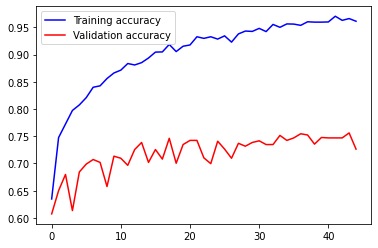

<Figure size 432x288 with 0 Axes>

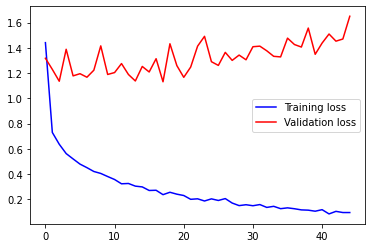

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

# Confusion Matrix

In [ ]:
print(validation_generator.classes)

[0 0 0 ... 4 4 4]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

num_test_images = 1457 
# Y_pred = finetune_model.predict_generator(validation_generator, num_test_images // BATCH_SIZE+1)
Y_pred = model.predict_generator(validation_generator, num_test_images)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('\nClassification Report')
# 7 target_names = ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Eczema Photos', 'Light Diseases and Disorders of Pigmentation', 'Nail Fungus and other Nail Disease', 'Vascular Tumors', 'Warts Molluscum and other Viral Infections']
# 5 target_names = ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Light Diseases and Disorders of Pigmentation', 'Vascular Tumors', 'Warts Molluscum and other Viral Infections']
target_names = ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Eczema Photos', 'Light Diseases and Disorders of Pigmentation', 'Nail Fungus and other Nail Disease', 'Vascular Tumors', 'Warts Molluscum and other Viral Infections']

print(classification_report(validation_generator.classes, y_pred, target_names=used_data))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[60 92 80 32 47]
 [48 83 86 30 41]
 [56 97 77 33 46]
 [24 51 31 12 25]
 [46 80 59 33 43]]

Classification Report
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.26      0.19      0.22       311
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.21      0.29      0.24       288
                                                     Eczema Photos       0.23      0.25      0.24       309
                      Light Diseases and Disorders of Pigmentation       0.09      0.08      0.08       143
                                Nail Fungus and other Nail Disease       0.21      0.16      0.19       261

                                                          accuracy                           0.21      1312
                                                         macro avg       0.20      0.20      0.19      1312
   

# Test Predict

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = finetune_model.predict(images)
  classes_predict = finetune_model.predict_classes(images)
  print(classes)
  print(classes_predict)

Saving t-warts-common-10.jpg to t-warts-common-10.jpg
[[0.21589687 0.02971862 0.0526148  0.10036353 0.07585002 0.06511889
  0.4604372 ]]
[6]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# Save Model

In [ ]:
model.save("dermnet.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# Upload to GCS

In [ ]:
!ls -al

total 28
drwxr-xr-x 1 root root 4096 Jun  1 17:35 .
drwxr-xr-x 1 root root 4096 Jun  1 17:32 ..
-rw-r--r-- 1 root root  720 Jun  1 17:34 adc.json
-rw-r--r-- 1 root root    0 Jun  1 17:35 a.txt
drwxr-xr-x 1 root root 4096 Jun  1 17:34 .config
drwxr-xr-x 1 root root 4096 May  6 13:44 sample_data


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
project_id ='plexiform-being-312905'
bucket_name = 'dermnet'

In [ ]:
from datetime import datetime

now = datetime.now()
current_time = now.strftime("%d%m%y-%H%M%S")
current_time

'020621-185129'

In [ ]:
!gsutil cp dermnet.h5 gs://{bucket_name}/{current_time}/

Copying file://dermnet.h5 [Content-Type=application/octet-stream]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

-
Operation completed over 1 objects/1.2 GiB.                                      
